In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from collections import Counter

import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import roc_curve, auc,roc_auc_score  # 计算roc和auc
from sklearn.model_selection import train_test_split


In [70]:
dataset = pd.read_excel("Product_Reviewer_Features_Label_contentsimilarity.xlsx")

In [71]:
data_ratio = 0.082 # select 10% of geniune geniune in original dataset with total spam samples
random_seed = 100

sampledataframe = dataset[dataset["Label"]==0].sample(frac=data_ratio, random_state=random_seed)

sampledataframe=pd.concat([sampledataframe,dataset[dataset["Label"]==1]])

Counter(sampledataframe["Label"])

Counter({0: 6889, 1: 6898})

In [72]:
train_data_ratio = 0.6 #select 60% of samples as training dataset, 20% of samples as valid dataset, the rest as test dataset
valid_data_ratio = 0.5
random_seed1 = 388
random_seed2 = 699
train_dataframe = sampledataframe.sample(frac=train_data_ratio, random_state=random_seed1)
valid_dataframe = sampledataframe.drop(train_dataframe.index).sample(frac = valid_data_ratio, random_state=random_seed2)
test_dataframe = sampledataframe.drop(train_dataframe.index.append(valid_dataframe.index))

print(Counter(train_dataframe["Label"]))
print(Counter(valid_dataframe["Label"]))
print(Counter(test_dataframe["Label"]))

Counter({1: 4149, 0: 4123})
Counter({1: 1392, 0: 1366})
Counter({0: 1400, 1: 1357})


In [73]:
train_dataframe.head()

,Reviewer_id,Product_id,Reviewer_ReviewContent_Sent_len,Reviewer_ReviewContent_SUB_Len,Reviewer_ReviewContent_OBJ_Len,Reviewer_ReviewContent_First_Third_PRP,Reviewer_ReviewContent_First_Third_PRP_ratio,Reviewer_ReviewContent_Second_PRP,Reviewer_ReviewContent_Second_PRP_ratio,Reviewer_ReviewContent_avg_sent_len,...,Product_Behavior_group_toprating_rating_ratio,Product_Behavior_group_buttomrating_rating_ratio,Product_Behavior_group_posrating_rating_ratio,Product_Behavior_group_negrating_rating_ratio,Product_Behavior_Early_Review_Ratio,Text,Rating,Label,Reviewer_content_consine_similarity,Product_content_consine_similarity
38508,13025,337,93,3,0,0,0.000000,0,0.000000,163.666667,...,0.095833,0.008333,0.095833,0.037500,0.017241,This place is highly recommended! The food is ...,4,0,0.029834,0.117581
70057,39806,133,320,8,6,3,0.009375,0,0.000000,425.333333,...,0.093628,0.009103,0.093628,0.031209,0.005263,So I went to this place for breakfast and must...,4,0,0.034625,0.072036
79011,56726,508,142,5,3,3,0.021127,0,0.000000,159.428571,...,0.082126,0.003623,0.082126,0.032609,0.029557,Went here for a nice lunch and that's what I g...,5,0,0.086202,0.098920
88360,95235,718,152,2,5,1,0.006579,1,0.006579,187.666667,...,0.109948,0.005236,0.109948,0.015707,0.021739,it has its own unique style but I wasnt thrill...,2,1,0.061172,0.131702
41228,14388,276,145,3,2,0,0.000000,2,0.013793,186.000000,...,0.074144,0.005703,0.074144,0.053232,0.007463,"Good food, but the wait. The wait! Maybe I'm t...",3,1,0.059694,0.113649


In [74]:
columns = train_dataframe.columns.tolist()

In [75]:
columns.remove("Label")

In [76]:
features = columns[2:]

In [77]:
features

['Reviewer_ReviewContent_Sent_len',
 'Reviewer_ReviewContent_SUB_Len',
 'Reviewer_ReviewContent_OBJ_Len',
 'Reviewer_ReviewContent_First_Third_PRP',
 'Reviewer_ReviewContent_First_Third_PRP_ratio',
 'Reviewer_ReviewContent_Second_PRP',
 'Reviewer_ReviewContent_Second_PRP_ratio',
 'Reviewer_ReviewContent_avg_sent_len',
 'Reviewer_ReviewContent_avg_first_third_ratio',
 'Reviewer_ReviewContent_avg_second_ratio',
 'Reviewer_ReviewContent_avg_sub_ratio',
 'Reviewer_ReviewContent_avg_obj_ratio',
 'Reviewer_ReviewContent_avg_sub_to_allpro_ratio',
 'Reviewer_ReviewContent_avg_obj_to_allpro_ratio',
 'Reviewer_Average_Rank',
 'Reviewer_Rank_SD',
 'Reviewer_Behavior_group_rank_common',
 'Reviewer_Behavior_group_extreme_rating_ratio',
 'Reviewer_Behavior_group_toprating_rating_ratio',
 'Reviewer_Behavior_group_buttomrating_rating_ratio',
 'Reviewer_Behavior_group_posrating_rating_ratio',
 'Reviewer_Behavior_group_negrating_rating_ratio',
 'Reviewer_Behavior_Early_Review_Ratio',
 'Product_ReviewCon

In [78]:
features.remove("Rating")
features.remove("Text")

In [79]:
features

['Reviewer_ReviewContent_Sent_len',
 'Reviewer_ReviewContent_SUB_Len',
 'Reviewer_ReviewContent_OBJ_Len',
 'Reviewer_ReviewContent_First_Third_PRP',
 'Reviewer_ReviewContent_First_Third_PRP_ratio',
 'Reviewer_ReviewContent_Second_PRP',
 'Reviewer_ReviewContent_Second_PRP_ratio',
 'Reviewer_ReviewContent_avg_sent_len',
 'Reviewer_ReviewContent_avg_first_third_ratio',
 'Reviewer_ReviewContent_avg_second_ratio',
 'Reviewer_ReviewContent_avg_sub_ratio',
 'Reviewer_ReviewContent_avg_obj_ratio',
 'Reviewer_ReviewContent_avg_sub_to_allpro_ratio',
 'Reviewer_ReviewContent_avg_obj_to_allpro_ratio',
 'Reviewer_Average_Rank',
 'Reviewer_Rank_SD',
 'Reviewer_Behavior_group_rank_common',
 'Reviewer_Behavior_group_extreme_rating_ratio',
 'Reviewer_Behavior_group_toprating_rating_ratio',
 'Reviewer_Behavior_group_buttomrating_rating_ratio',
 'Reviewer_Behavior_group_posrating_rating_ratio',
 'Reviewer_Behavior_group_negrating_rating_ratio',
 'Reviewer_Behavior_Early_Review_Ratio',
 'Product_ReviewCon

In [80]:
#All features in Product_centric & Reviewer_centric
features_Product_Reviewer = features[:-2]

In [81]:
#All features in Product_centric & Reviewer_centric & Reviewer_content_similarity
features_Product_Reviewer_Reviewer_conten_sim = features[:-1]

In [82]:
#All features in Product_centric & Reviewer_centric & Product_content_similarity
features_Product_Reviewer_Product_conten_sim = features[:-2]
features_Product_Reviewer_Product_conten_sim.append(features[-1])

In [83]:
#All features in Reviewer_reviewcontent
features_Reviewer_ReviewContent = features[:14]

In [84]:
#All features in Reviewer_Behavior
features_Reviewer_Behavior = features[14:23]

In [85]:
#All features in Product_reviewcontent
features_Product_ReviewContent = features[23:37]

In [86]:
#All features in Product_Behavior
features_Product_Behavior = features[37:46]

In [87]:
#把features 改成什么不同的featu
# train_X = train_dataframe[features]
# train_Y = train_dataframe["Label"]
# valid_X = valid_dataframe[features]
# valid_Y = valid_dataframe["Label"]

In [129]:
# train_X = train_dataframe[features_Reviewer_ReviewContent]
# train_Y = train_dataframe["Label"]
# valid_X = valid_dataframe[features_Reviewer_ReviewContent]
# valid_Y = valid_dataframe["Label"]
# path = 'All features in Reviewer_reviewcontent'

In [153]:
# train_X = train_dataframe[features_Reviewer_Behavior]
# train_Y = train_dataframe["Label"]
# valid_X = valid_dataframe[features_Reviewer_Behavior]
# valid_Y = valid_dataframe["Label"]
# path = 'All features in Reviewer_Behavior'


In [187]:
# train_X = train_dataframe[features_Product_ReviewContent]
# train_Y = train_dataframe["Label"]
# valid_X = valid_dataframe[features_Product_ReviewContent]
# valid_Y = valid_dataframe["Label"]
# path = 'features_Product_ReviewContent'

In [207]:
# train_X = train_dataframe[features_Product_Behavior]
# train_Y = train_dataframe["Label"]
# valid_X = valid_dataframe[features_Product_Behavior]
# valid_Y = valid_dataframe["Label"]
# path = 'features_Product_Behavior'

In [227]:
# train_X = train_dataframe[features_Product_Reviewer]
# train_Y = train_dataframe["Label"]
# valid_X = valid_dataframe[features_Product_Reviewer]
# valid_Y = valid_dataframe["Label"]
# path = 'features_Product_Reviewer'

In [247]:
# train_X = train_dataframe[features_Product_Reviewer_Reviewer_conten_sim]
# train_Y = train_dataframe["Label"]
# valid_X = valid_dataframe[features_Product_Reviewer_Reviewer_conten_sim]
# valid_Y = valid_dataframe["Label"]
# path = 'features_Product_Reviewer_Reviewer_conten_sim'

In [2]:
train_X = train_dataframe[features_Product_Reviewer_Product_conten_sim]
train_Y = train_dataframe["Label"]
valid_X = valid_dataframe[features_Product_Reviewer_Product_conten_sim]
valid_Y = valid_dataframe["Label"]
path = 'features_Product_Reviewer_Product_conten_sim'

NameError: name 'train_dataframe' is not defined

# Train

In [268]:

lr_model = LogisticRegression(C = 1, solver='liblinear')
knn_model = KNeighborsClassifier(2)
svc_model = SVC()
dec_model = DecisionTreeClassifier(max_depth=5)
rfc_model = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
adb_model = AdaBoostClassifier()
gnb = GaussianNB()

accu = {}
precision = {}
recall = {}
f1 = {}
roc_auc ={}

model_dic = {"LogisticRegreesion":lr_model,
             "KNN": knn_model,
             "SVC":svc_model,
             "DecisionTree":dec_model,
             "RandomFroest":rfc_model,
             "AdaBoost":adb_model,   
             "GaussianNB":gnb}

for model_name,dicmodel in model_dic.items():
    trainmodel = dicmodel.fit(train_X,train_Y)
    valid_Y_hat = dicmodel.predict(valid_X)
    accuracy = accuracy_score(valid_Y, valid_Y_hat)
    accu[model_name]=accuracy

    precision[model_name] = metrics.precision_score(valid_Y, valid_Y_hat)
    recall[model_name] = metrics.recall_score(valid_Y, valid_Y_hat)
    f1[model_name] = metrics.f1_score(valid_Y, valid_Y_hat)
    
    fpr, tpr, threshold = roc_curve(valid_Y, valid_Y_hat)
    
    roc_auc[model_name] = roc_auc_score(valid_Y, valid_Y_hat)
 

In [269]:
accu

{'LogisticRegreesion': 0.7367657722987673,
 'KNN': 0.6131254532269761,
 'SVC': 0.6990572878897752,
 'DecisionTree': 0.7751994198694706,
 'RandomFroest': 0.686366932559826,
 'AdaBoost': 0.7722987672226251,
 'GaussianNB': 0.6802030456852792}

In [270]:
precision

{'LogisticRegreesion': 0.750375939849624,
 'KNN': 0.6979293544457978,
 'SVC': 0.6789808917197452,
 'DecisionTree': 0.8029827315541601,
 'RandomFroest': 0.6886184681460272,
 'AdaBoost': 0.7788321167883212,
 'GaussianNB': 0.6352067868504772}

In [271]:
recall

{'LogisticRegreesion': 0.7169540229885057,
 'KNN': 0.41163793103448276,
 'SVC': 0.7658045977011494,
 'DecisionTree': 0.7349137931034483,
 'RandomFroest': 0.6910919540229885,
 'AdaBoost': 0.7665229885057471,
 'GaussianNB': 0.860632183908046}

In [272]:
f1

{'LogisticRegreesion': 0.7332843497428361,
 'KNN': 0.5178490736556711,
 'SVC': 0.7197839297771775,
 'DecisionTree': 0.7674418604651163,
 'RandomFroest': 0.6898529939046253,
 'AdaBoost': 0.7726285300506878,
 'GaussianNB': 0.7309334960341671}

In [273]:
metrics.precision_recall_curve(valid_Y, valid_Y_hat)

(array([0.50471356, 0.63520679, 1.        ]),
 array([1.        , 0.86063218, 0.        ]),
 array([0, 1], dtype=int64))

In [274]:
# # Add noisy features to make the problem harder
# random_state = np.random.RandomState(0)
# n_samples, n_features = X.shape
# X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# # shuffle and split training and test sets
# # X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=.3, random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# # Learn to predict each class against the other
# svm = svm.SVC(kernel='linear', probability=True, random_state=random_state)

# # 通过decision_function()计算得到的y_score的值，用在roc_curve()函数中
# y_score = svm.fit(X_train, y_train).decision_function(X_test)

# # Compute ROC curve and ROC area for each class
# fpr, tpr, threshold = roc_curve(y_test, y_score)  # 计算真正率和假正率
# roc_auc = auc(fpr, tpr)  ###计算auc的值


In [275]:
train_X

,Reviewer_ReviewContent_Sent_len,Reviewer_ReviewContent_SUB_Len,Reviewer_ReviewContent_OBJ_Len,Reviewer_ReviewContent_First_Third_PRP,Reviewer_ReviewContent_First_Third_PRP_ratio,Reviewer_ReviewContent_Second_PRP,Reviewer_ReviewContent_Second_PRP_ratio,Reviewer_ReviewContent_avg_sent_len,Reviewer_ReviewContent_avg_first_third_ratio,Reviewer_ReviewContent_avg_second_ratio,...,Product_Average_Rank,Product_Rank_SD,Product_Behavior_group_rank_common,Product_Behavior_group_extreme_rating_ratio,Product_Behavior_group_toprating_rating_ratio,Product_Behavior_group_buttomrating_rating_ratio,Product_Behavior_group_posrating_rating_ratio,Product_Behavior_group_negrating_rating_ratio,Product_Behavior_Early_Review_Ratio,Product_content_consine_similarity
38508,93,3,0,0,0.000000,0,0.000000,163.666667,0.022403,0.000000,...,4.137931,0.926193,4,0.095833,0.095833,0.008333,0.095833,0.037500,0.017241,0.117581
70057,320,8,6,3,0.009375,0,0.000000,425.333333,0.011755,0.000000,...,4.047368,1.014638,4,0.093628,0.093628,0.009103,0.093628,0.031209,0.005263,0.072036
79011,142,5,3,3,0.021127,0,0.000000,159.428571,0.015233,0.003584,...,4.078818,0.869559,4,0.082126,0.082126,0.003623,0.082126,0.032609,0.029557,0.098920
88360,152,2,5,1,0.006579,1,0.006579,187.666667,0.007105,0.001776,...,4.152174,1.032094,5,0.109948,0.109948,0.005236,0.109948,0.015707,0.021739,0.131702
41228,145,3,2,0,0.000000,2,0.013793,186.000000,0.000000,0.007168,...,3.925373,0.938939,4,0.074144,0.074144,0.005703,0.074144,0.053232,0.007463,0.113649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19894,1323,28,36,23,0.017385,7,0.005291,843.000000,0.012513,0.002334,...,4.013423,0.965531,4,0.088629,0.088629,0.005017,0.088629,0.043478,0.006711,0.098477
43716,1347,28,34,20,0.014848,1,0.000742,1089.500000,0.011261,0.001624,...,4.057621,0.934756,5,0.093449,0.093449,0.002290,0.093449,0.043060,0.003717,0.072262
75628,290,7,7,2,0.006897,0,0.000000,303.333333,0.010989,0.000000,...,3.857143,0.925820,4,0.062678,0.062678,0.002849,0.062678,0.045584,0.021978,0.079748
82122,79,1,4,1,0.012658,2,0.025316,272.333333,0.008568,0.002448,...,4.057621,0.934756,5,0.093449,0.093449,0.002290,0.093449,0.043060,0.003717,0.072262


In [276]:
# # 尝试 1
# n_samples, n_features = train_X.shape
# random_state = np.random.RandomState(0)
# train_X = np.c_[train_X, random_state.randn(n_samples, 20 * n_features)]
# valid_X = np.c_[valid_X, random_state.randn(n_samples, 20 * n_features)]
# li_model = svm.SVC(kernel='linear', probability=True, random_state=random_state)
# trainmodel = li_model.fit(train_X,train_Y)
# valid_Y_hat = li_model.predict(valid_X)
# fpr, tpr, threshold = roc_curve(valid_Y, valid_Y_hat)
# roc_auc = auc(fpr, tpr)
# print(fpr, tpr)

In [277]:
# trainmodel = knn_model.fit(train_X,train_Y)
# valid_Y_hat = knn_model.predict(valid_X)
# fpr, tpr, threshold = roc_curve(valid_Y, valid_Y_hat)
# roc_auc = auc(fpr, tpr)
# print(fpr, tpr)

In [278]:
# # 尝试2
# random_state = np.random.RandomState(0)
# li_model = svm.SVC(kernel='linear', probability=True, random_state=random_state)
# trainmodel = li_model.fit(train_X,train_Y)
# valid_Y_hat = li_model.predict(valid_X)
# fpr, tpr, threshold = roc_curve(valid_Y, valid_Y_hat)
# roc_auc = auc(fpr, tpr)
# print(fpr, tpr)

In [279]:
trainmodel = svc_model.fit(train_X,train_Y)
valid_Y_hat = svc_model.predict(valid_X)
fpr, tpr, threshold = roc_curve(valid_Y, valid_Y_hat)
roc_auc = auc(fpr, tpr)
print(fpr, tpr)

[0.         0.36896047 1.        ] [0.        0.7658046 1.       ]


<Figure size 432x288 with 0 Axes>

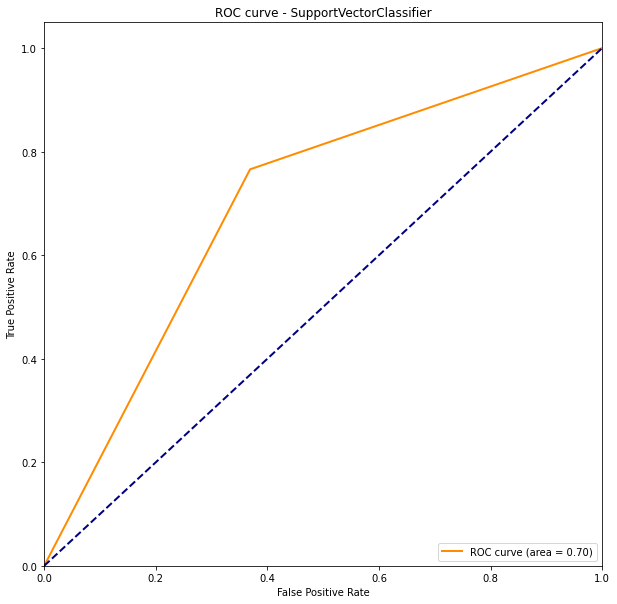

In [280]:
plt.figure()
lw = 2
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)  # 假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - SupportVectorClassifier')
plt.legend(loc="lower right")
plt.savefig('./'+ path +'/ROC curve - SupportVectorClassifier.png')
plt.show()

[0.         0.24304539 1.        ] [0.         0.71695402 1.        ]


<Figure size 432x288 with 0 Axes>

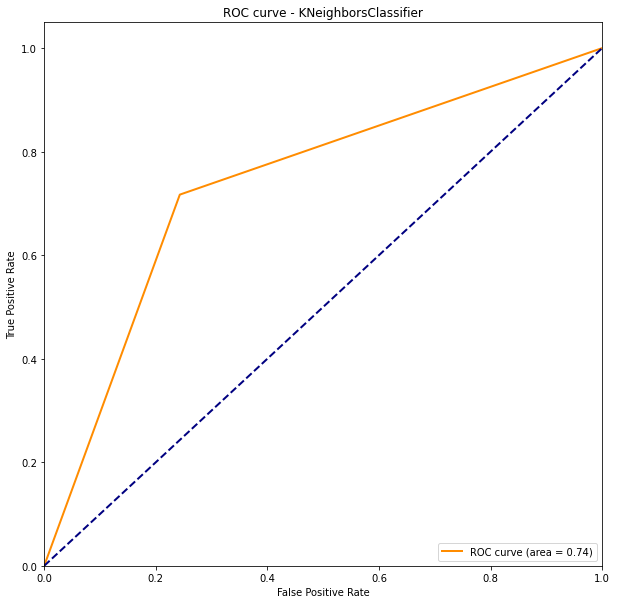

In [281]:
trainmodel = lr_model.fit(train_X,train_Y)
valid_Y_hat = lr_model.predict(valid_X)
fpr, tpr, threshold = roc_curve(valid_Y, valid_Y_hat)
roc_auc = auc(fpr, tpr)
print(fpr, tpr)

plt.figure()
lw = 2
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)  # 假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - KNeighborsClassifier')
plt.legend(loc="lower right")
plt.savefig('./'+ path +'/ROC curve - KNeighborsClassifier.png')
plt.show()

[0.         0.18155198 1.        ] [0.         0.41163793 1.        ]


<Figure size 432x288 with 0 Axes>

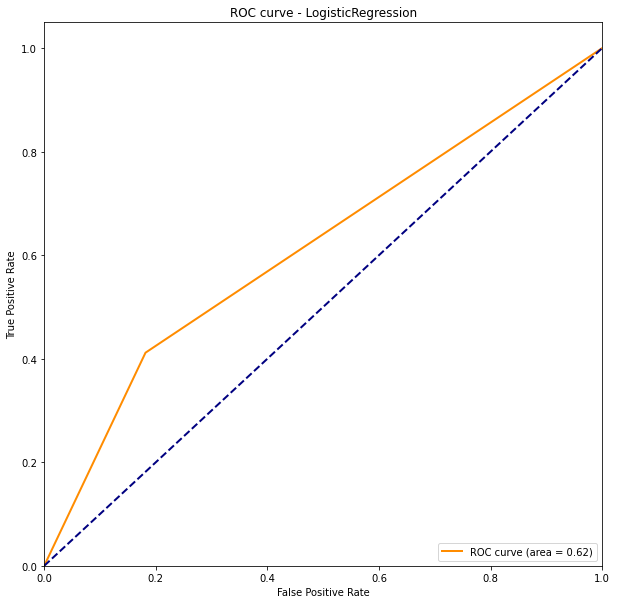

In [282]:
trainmodel = knn_model.fit(train_X,train_Y)
valid_Y_hat = knn_model.predict(valid_X)
fpr, tpr, threshold = roc_curve(valid_Y, valid_Y_hat)
roc_auc = auc(fpr, tpr)
print(fpr, tpr)

plt.figure()
lw = 2
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)  # 假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - LogisticRegression')
plt.legend(loc="lower right")
plt.savefig('./'+ path +'/ROC curve - LogisticRegression.png')
plt.show()

[0.         0.18374817 1.        ] [0.         0.73491379 1.        ]


<Figure size 432x288 with 0 Axes>

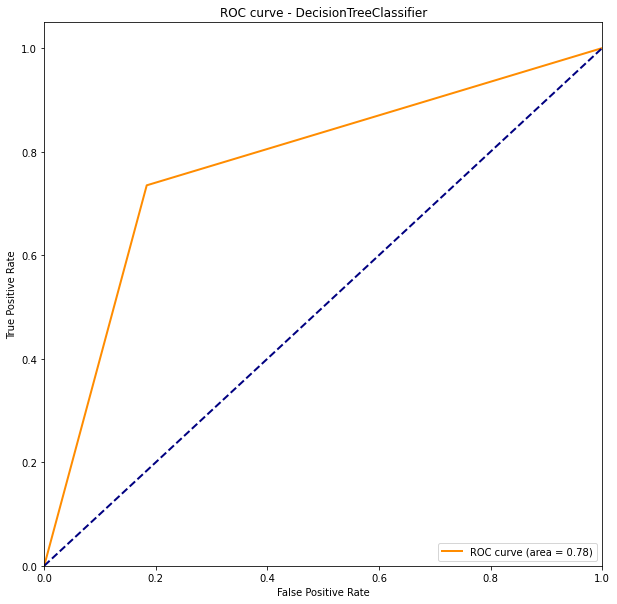

In [283]:
trainmodel = dec_model.fit(train_X,train_Y)
valid_Y_hat = dec_model.predict(valid_X)
fpr, tpr, threshold = roc_curve(valid_Y, valid_Y_hat)
roc_auc = auc(fpr, tpr)
print(fpr, tpr)

plt.figure()
lw = 2
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)  # 假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - DecisionTreeClassifier')
plt.legend(loc="lower right")
plt.savefig('./'+ path +'/ROC curve - DecisionTreeClassifier.png')
plt.show()

[0.         0.33235725 1.        ] [0.         0.74497126 1.        ]


<Figure size 432x288 with 0 Axes>

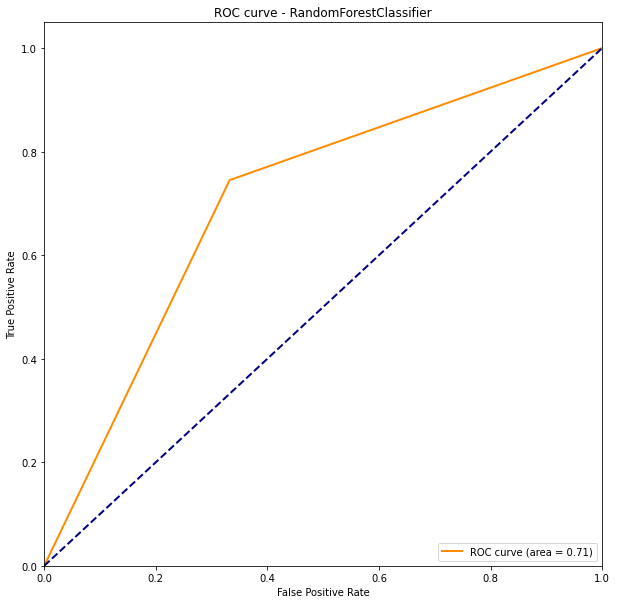

In [284]:
trainmodel = rfc_model.fit(train_X,train_Y)
valid_Y_hat = rfc_model.predict(valid_X)
fpr, tpr, threshold = roc_curve(valid_Y, valid_Y_hat)
roc_auc = auc(fpr, tpr)
print(fpr, tpr)

plt.figure()
lw = 2
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)  # 假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - RandomForestClassifier')
plt.legend(loc="lower right")
plt.savefig('./'+ path +'/ROC curve - RandomForestClassifier.png')
plt.show()

[0.         0.22181552 1.        ] [0.         0.76652299 1.        ]


<Figure size 432x288 with 0 Axes>

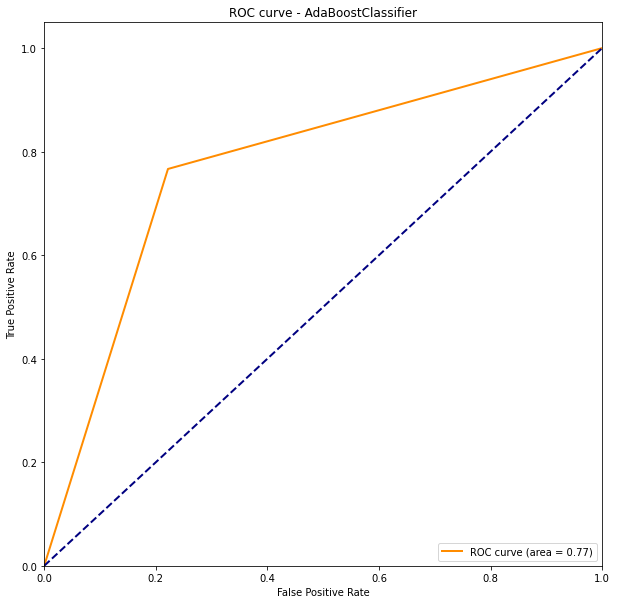

In [285]:
trainmodel = adb_model.fit(train_X,train_Y)
valid_Y_hat = adb_model.predict(valid_X)
fpr, tpr, threshold = roc_curve(valid_Y, valid_Y_hat)
roc_auc = auc(fpr, tpr)
print(fpr, tpr)

plt.figure()
lw = 2
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)  # 假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - AdaBoostClassifier')
plt.legend(loc="lower right")
plt.savefig('./'+ path +'/ROC curve - AdaBoostClassifier.png')
plt.show()

[0.         0.50366032 1.        ] [0.         0.86063218 1.        ]


<Figure size 432x288 with 0 Axes>

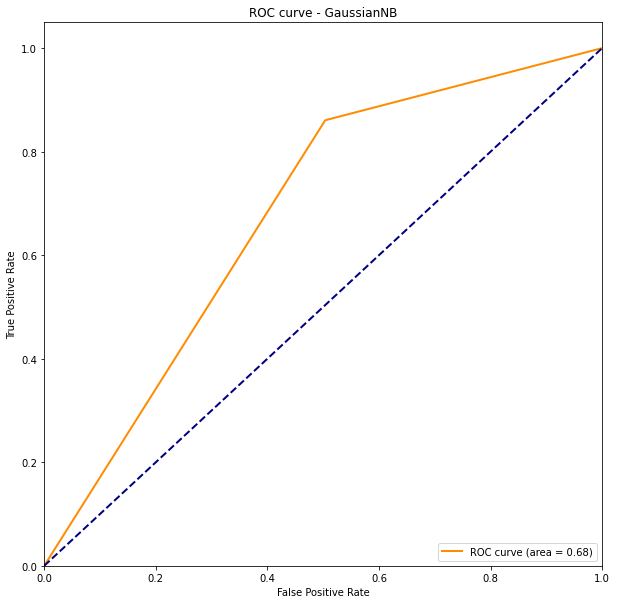

In [286]:
trainmodel = gnb.fit(train_X,train_Y)
valid_Y_hat = gnb.predict(valid_X)
fpr, tpr, threshold = roc_curve(valid_Y, valid_Y_hat)
roc_auc = auc(fpr, tpr)
print(fpr, tpr)

plt.figure()
lw = 2
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)  # 假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - GaussianNB')
plt.legend(loc="lower right")
plt.savefig('./'+ path +'/ROC curve - GaussianNB.png')
plt.show()
